In [144]:
#Import all necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from matplotlib import pyplot as plt

In [145]:
#Import Data - 2020 shooting 
nba2020_shooting = pd.read_excel (r'C:\Users\saireddy3\Desktop\NBAAnalysis\NBA2020_shooting.xlsx')

#Import Data - 2020 totals 
nba2020_totals = pd.read_excel (r'C:\Users\saireddy3\Desktop\NBAAnalysis\NBA2020_totals.xlsx')



#Cleaing player names and removing null values from shooting stats
for i in range(len(nba2020_shooting["Player"])):
    try:
        index = nba2020_shooting["Player"][i].index("\\")
        nba2020_shooting["Player"][i] = nba2020_shooting["Player"][i][0:index]
    except:
        pass
nba2020_shooting.replace(np.nan, 0)

#Cleaing player names and removing null values from total game stats
for i in range(len(nba2020_totals["Player"])):
    try:
        index = nba2020_totals["Player"][i].index("\\")
        nba2020_totals["Player"][i] = nba2020_totals["Player"][i][0:index]
    except:
        pass

C:\Users\saireddy3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\saireddy3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [146]:
#Combine data
stats2020 = nba2020_totals.merge(nba2020_shooting, how="left", left_on="Player", right_on="Player")
year2020 = 2020
stats2020["Year"] = 2020
stats2020["Highlight"] = "NA"
print(stats2020.columns)

for i in range(len(stats2020["Player"])):
    if stats2020["Player"][i] == "Russell Westbrook" or stats2020["Player"][i] == "Chris Paul" or stats2020["Player"][i] == "John Wall 2017" or stats2020["Player"][i] == "James Harden" or stats2020["Player"][i] == "Ben Simmons" or stats2020["Player"][i] == "J.J. Redick" or stats2020["Player"][i] == "Ja Morant" or stats2020["Player"][i] == "Markelle Fultz" or stats2020["Player"][i] == "Shai Gilgeous-Alexander" or stats2020["Player"][i] =="Kyrie Irving" :
        stats2020["Highlight"][i] = "Yes"
    else:
        pass

Index(['Rk_x', 'Player', 'Pos_x', 'Age_x', 'Tm_x', 'G_x', 'GS', 'MP_x', 'FG',
       'FGA', 'FG%_x', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Rk_y', 'Pos_y', 'Age_y', 'Tm_y', 'G_y', 'MP_y', 'FG%_y',
       'Dist.', '% of FGA by Distance 2P', '% of FGA by Distance 0-3',
       '% of FGA by Distance 3-10', '% of FGA by Distance 10-16',
       '% of FGA by Distance 16-3P', '% of FGA by Distance 3P',
       'FG% by Distance 2P', 'FG% by Distance 0-3', 'FG% by Distance 3-10',
       'FG% by Distance 10-16', 'FG% by Distance 16-3P', 'FG% by Distance 3P',
       '% of FG Ast'd 2P', '% of FG Ast'd 3P', 'Year', 'Highlight'],
      dtype='object')


C:\Users\saireddy3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [147]:
#Filter down data to just guards
filter2020stats = stats2020[(stats2020["2PA"] > 200) &(stats2020["Pos_x"] == "G")]
filter2020stats.head(25)

,Rk_x,Player,Pos_x,Age_x,Tm_x,G_x,GS,MP_x,FG,FGA,...,FG% by Distance 2P,FG% by Distance 0-3,FG% by Distance 3-10,FG% by Distance 10-16,FG% by Distance 16-3P,FG% by Distance 3P,% of FG Ast'd 2P,% of FG Ast'd 3P,Year,Highlight
27,20,D.J. Augustin,G,32,ORL,57,13,1420,184,461,...,0.438,0.571,0.286,0.500,0.333,0.348,0.193,0.629,2020,NA
31,24,Lonzo Ball,G,22,NOP,63,54,2025,277,687,...,0.442,0.608,0.246,0.324,0.278,0.375,0.411,0.824,2020,NA
35,28,RJ Barrett,G,19,NYK,56,55,1704,292,727,...,0.432,0.568,0.267,0.277,0.288,0.320,0.354,0.937,2020,NA
58,35,Bradley Beal,G,26,WAS,57,57,2053,593,1303,...,0.515,0.689,0.397,0.438,0.387,0.353,0.376,0.635,2020,NA
59,36,Malik Beasley,G,23,TOT,55,14,1209,227,534,...,0.465,0.634,0.261,0.471,0.378,0.388,0.667,0.888,2020,NA
60,36,Malik Beasley,G,23,TOT,55,14,1209,227,534,...,0.421,0.581,0.231,0.452,0.407,0.360,0.644,0.966,2020,NA
61,36,Malik Beasley,G,23,TOT,55,14,1209,227,534,...,0.517,0.672,0.300,0.500,0.300,0.426,0.689,0.796,2020,NA
94,47,Eric Bledsoe,G,30,MIL,61,61,1646,334,703,...,0.533,0.709,0.354,0.362,0.404,0.344,0.319,0.459,2020,NA
95,48,Bogdan Bogdanović,G,27,SAC,61,28,1766,337,766,...,0.532,0.677,0.459,0.434,0.552,0.372,0.358,0.854,2020,NA
110,55,Devin Booker,G,23,PHO,70,70,2512,627,1283,...,0.549,0.720,0.463,0.487,0.424,0.354,0.416,0.610,2020,NA


In [148]:
#Analysis of players who are elite at going to the rim and getting FTs
testData = filter2020stats.sort_values("% of FGA by Distance 2P", ascending = False)
print(testData[["Player","% of FGA by Distance 2P","FTA"]].head(20))

                       Player  % of FGA by Distance 2P  FTA
837               Ben Simmons                    0.989  298
637            T.J. McConnell                    0.959   42
760             Elfrid Payton                    0.843   86
971         Russell Westbrook                    0.834  380
695           Dejounte Murray                    0.826  114
365            Markelle Fultz                    0.825  159
864               Jeff Teague                    0.818  144
861               Jeff Teague                    0.818  197
1011           John Wall 2017                    0.810  527
677                 Ja Morant                    0.809  308
809              Derrick Rose                    0.805  139
125               Bruce Brown                    0.785  119
361              De'Aaron Fox                    0.773  342
831             Collin Sexton                    0.765  267
862               Jeff Teague                    0.761  144
859               Jeff Teague           

In [149]:
testData = filter2020stats.sort_values("FTA", ascending = True)
print(testData[["Player","% of FGA by Distance 0-3","FTA"]].head(45))

                        Player  % of FGA by Distance 0-3  FTA
114              Avery Bradley                     0.170   24
113                  Ky Bowman                     0.209   41
808                Rajon Rondo                     0.305   41
637             T.J. McConnell                     0.326   42
676              E'Twaun Moore                     0.167   45
319                  Kris Dunn                     0.398   54
553                 Tyus Jones                     0.175   58
945              Lonnie Walker                     0.317   61
498              Kevin Huerter                     0.139   64
59               Malik Beasley                     0.189   66
60               Malik Beasley                     0.143   66
61               Malik Beasley                     0.249   66
555                Cory Joseph                     0.158   70
378             Darius Garland                     0.180   72
131              Jalen Brunson                     0.178   75
31      

176.515873015873


<Figure size 90000x60000 with 0 Axes>

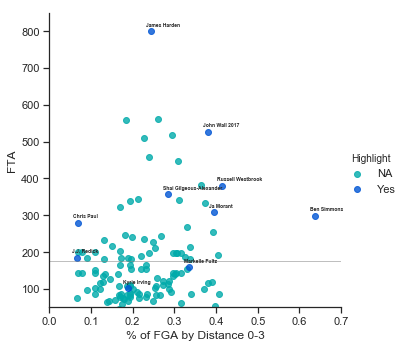

In [150]:
#Plot the data
colors = dict({ "Yes" : "winter", "No" : "ocean"})
sns.set_style('ticks')
plt.figure(dpi=1200)
testplot = sns.lmplot(data = filter2020stats,
                      x ="% of FGA by Distance 0-3", 
                      y = "FTA", 
                      palette = "winter_r",
                      hue = "Highlight",
                      fit_reg=False)
testplot.set(xlim = (0,.7))
testplot.set(ylim = (50,850))
sns.set(rc={'figure.figsize':(75,50)})
mean = filter2020stats["FTA"].mean()
print(mean)
plt.plot([0,1],[mean,mean], linewidth = .5, color = "grey")



for i in range(len(stats2020)):
    if stats2020["Highlight"][i] == "Yes":
        plt.annotate(stats2020["Player"][i], 
                     xy=(stats2020["% of FGA by Distance 0-3"][i],stats2020["FTA"][i]), 
                     xycoords='data', 
                     xytext = (-5,5),
                     textcoords='offset points',
                     weight = 'bold',
                     fontsize = 5)

plt.show()
testplot.savefig('John_Wall_to_the_basket.png', dpi = 500)